# DATA  ANALYTICS       

---
```
MINI PROJECT
```
---


 ***`Housing Price Prediction`***  


*   A22 Dhanashri Kasture
*   A37 Akshata Kulkarni


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/housepricedata (1).csv')

In [ ]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


Convert data into arrays for machine to process:

In [ ]:
dataset = df.values

In [ ]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])


We now split our dataset into input features (X) and the feature we wish to predict (Y).To do that split, we simply assign the first 10 columns of our array to a variable called X and the last column of our array to a variable called Y:

In [ ]:
X = dataset[:,0:10]

We then assign the last column of our array to Y:

In [ ]:
Y = dataset[:,10]

In [ ]:
from sklearn import preprocessing

We use a function called the min-max scaler, which scales the dataset so that all the input features lie between 0 and 1 inclusive (Normalization):

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [ ]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

Now, we split our dataset into a training set, a validation set and a test set.
We will use the code from scikit-learn called ‘train_test_split’, which split our dataset into a training set and a test set. We first import the code we need:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_train.shape

(1022, 10)

Since we want a separate validation set and test set, we can use the same function to do the split again on val_and_test:

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

To see the dimensions we simply run:

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


#Setting up the Architecture

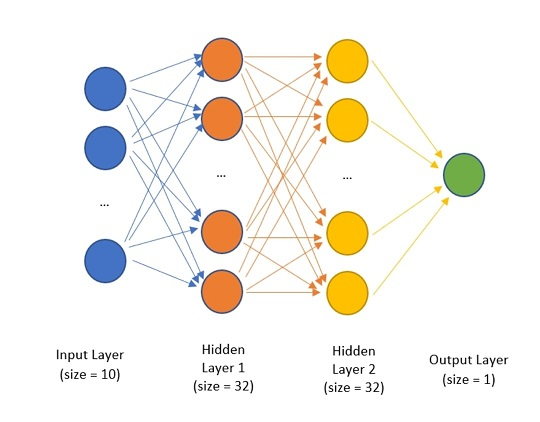

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

We specify that in our Keras sequential model like this:

In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='relu'),
])

Configuring the model with these settings requires us to call the function model.compile, like this:

In [ ]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Training on the data is pretty straightforward and requires us to write one line of code:

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.6829 - accuracy: 0.5166 - val_loss: 0.6801 - val_accuracy: 0.4977
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5127 - val_loss: 0.6769 - val_accuracy: 0.4977
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.5235 - val_loss: 0.6739 - val_accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.5303 - val_loss: 0.6709 - val_accuracy: 0.5342
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6710 - accuracy: 0.5342 - val_loss: 0.6678 - val_accuracy: 0.5479
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5440 - val_loss: 0.6645 - val_accuracy: 0.5616
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.5832 - val_loss: 0.6611 - val_accuracy: 0.5982
Epoch 8/100
3

To find the accuracy on test set, we run this:

In [ ]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2592 - accuracy: 0.8995


0.8995434045791626

In [ ]:
import matplotlib.pyplot as plt

Then, we want to visualize the training loss and the validation loss. To do so, we run this snippet of code:

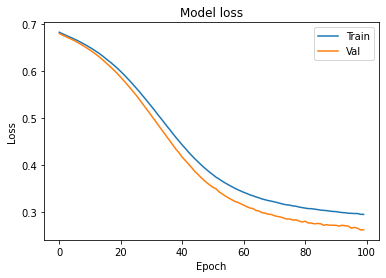

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

We do the same to plot our training accuracy and validation accuracy with the code below:

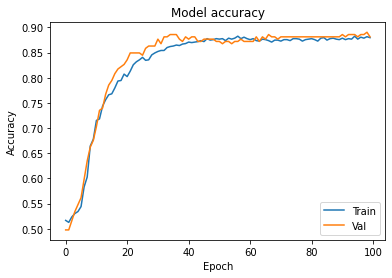

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


# Adding Regularization to our Neural Network

We formulate with a neural network that will badly overfit on our training set.

In [ ]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 49ms/step - loss: 0.4795 - accuracy: 0.7632 - val_loss: 0.4560 - val_accuracy: 0.7763
Epoch 2/100
32/32 [==============================] - 1s 34ms/step - loss: 0.3393 - accuracy: 0.8434 - val_loss: 0.3377 - val_accuracy: 0.8630
Epoch 3/100
32/32 [==============================] - 1s 33ms/step - loss: 0.3211 - accuracy: 0.8738 - val_loss: 0.4650 - val_accuracy: 0.8402
Epoch 4/100
32/32 [==============================] - 1s 33ms/step - loss: 0.3165 - accuracy: 0.8708 - val_loss: 0.3705 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 1s 34ms/step - loss: 0.2587 - accuracy: 0.8865 - val_loss: 0.4073 - val_accuracy: 0.8676
Epoch 6/100
32/32 [==============================] - 1s 33ms/step - loss: 0.2506 - accuracy: 0.8992 - val_loss: 0.3884 - val_accuracy: 0.8493
Epoch 7/100
32/32 [==============================] - 1s 34ms/step - loss: 0.2335 - accuracy: 0.8953 - val_loss: 0.3255 - val_accuracy: 0.9041
Epoch 

Here, we’ve made a much larger model and we’ve use the Adam optimizer. Adam is one of the most common optimizers we use, which adds some tweaks to stochastic gradient descent such that it reaches the lower loss function faster. If we run this code and plot the loss graphs for hist_2 using the code below:

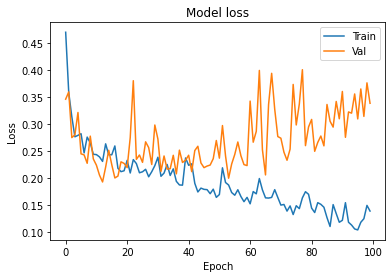

In [ ]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

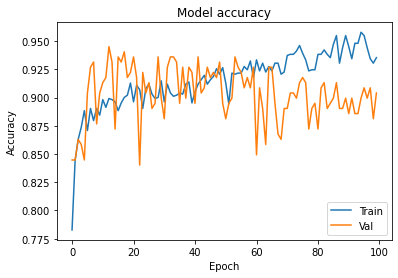

In [ ]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Import the code that we need for L2 regularization and dropout:

In [ ]:
from keras.layers import Dropout
from keras import regularizers

We then specify our third model like this:

In [ ]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 49ms/step - loss: 14.2736 - accuracy: 0.5930 - val_loss: 3.9103 - val_accuracy: 0.8630
Epoch 2/100
32/32 [==============================] - 1s 42ms/step - loss: 1.6910 - accuracy: 0.8386 - val_loss: 0.6866 - val_accuracy: 0.8356
Epoch 3/100
32/32 [==============================] - 1s 41ms/step - loss: 0.5876 - accuracy: 0.8523 - val_loss: 0.4918 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 1s 42ms/step - loss: 0.5330 - accuracy: 0.8571 - val_loss: 0.4561 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 1s 41ms/step - loss: 0.4997 - accuracy: 0.8767 - val_loss: 0.4475 - val_accuracy: 0.8858
Epoch 6/100
32/32 [==============================] - 1s 42ms/step - loss: 0.4879 - accuracy: 0.8689 - val_loss: 0.4321 - val_accuracy: 0.8995
Epoch 7/100
32/32 [==============================] - 1s 42ms/step - loss: 0.4798 - accuracy: 0.8757 - val_loss: 0.4181 - val_accuracy: 0.9087
Epoch

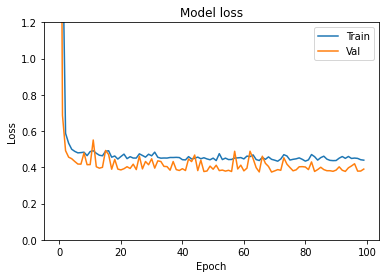

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

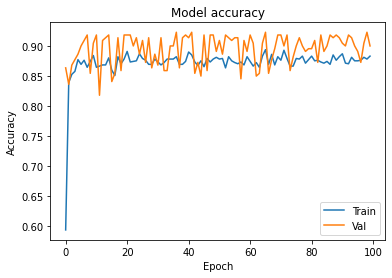

In [ ]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# TESTING

In [ ]:
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[[[ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  ...
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          5.223998   ...  0.          0.
    0.16727924]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]]

 [[ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  ...
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]]

 [[ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.   

In [ ]:
X_train[0]

array([0.02643203, 0.66666667, 0.5       , 0.22389525, 0.66666667,
       0.        , 0.25      , 0.33333333, 0.33333333, 0.33427362])

In [ ]:
Y_train[0]

1

In [ ]:
Y_train[:100]

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0])


# SUMMARY


In this project, we follwed following procedure :



---



*   Explore and process the data
*   Build and train our neural network
*   Visualize loss and accuracy
*   Add regularization to our neural network


To deal with overfitting, we can code in the folowing strategies into our model each with about one line of code.



*   L2 Regularization
*   Dropout

---

 In this way we apply our regularization techniques ton reduce overfitting to the training set.





